In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('../images/berlin.jpg')

# Sharpening

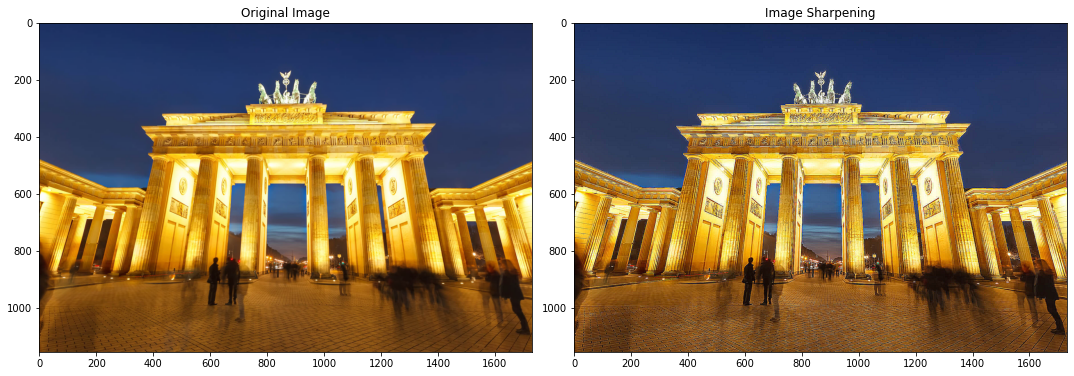

In [3]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

axs[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image Sharpening')

plt.show()

# Dilation, Erosion

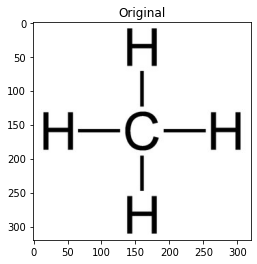

In [4]:
image = cv2.imread('../images/molecul.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()

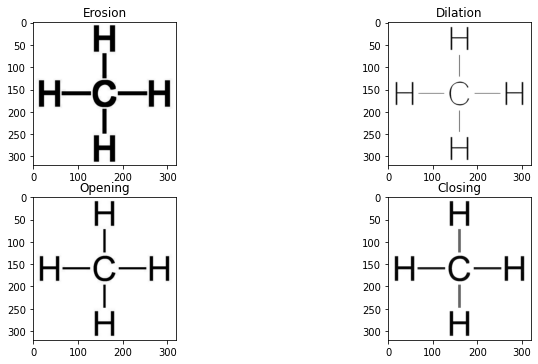

In [5]:
# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()


# Now we erode
#Highly recommended method to highlight contour areas
erosion = cv2.erode(image, kernel, iterations = 1)
axs[0][0].imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Erosion')

# Dilate
dilation = cv2.dilate(image, kernel, iterations = 1)
axs[0][1].imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Dilation')

# Opening
#Recommended for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
axs[1][0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
axs[1][0].set_title('Opening')

# Closing
#Also recommended for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
axs[1][1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
axs[1][1].set_title('Closing')


plt.show()

In [6]:
# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

In [7]:
sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

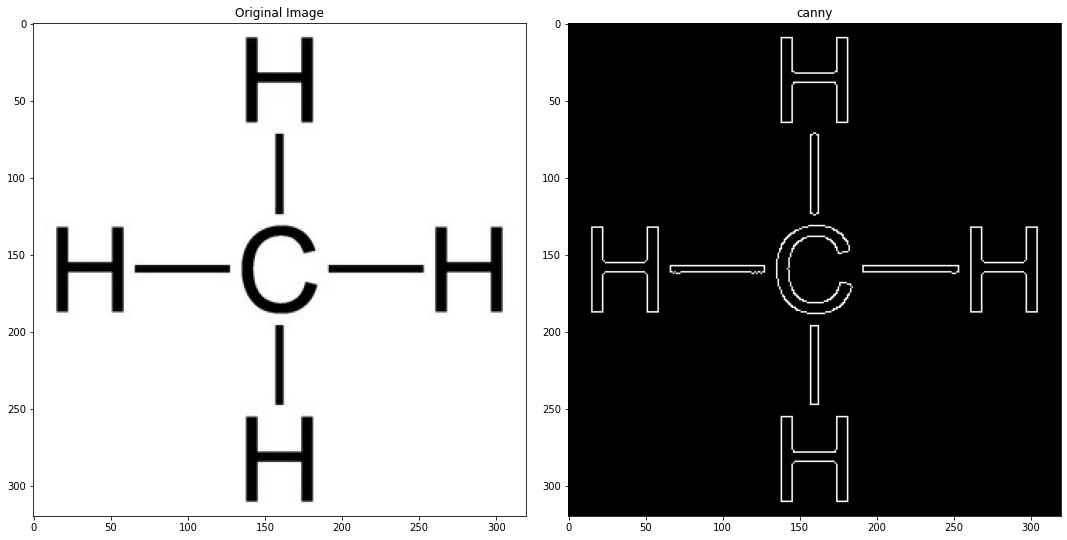

In [8]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Then, we need to provide two values: threshold1 and threshold2. Any gradient 
# value larger than threshold2 is considered to be an edge. Any value below 
# threshold1 is considered not to be an edge. Values in between threshold1 and 
# threshold2 are either classiﬁed as edges or non-edges based on how their 
# intensities are “connected”. In this case, any gradient values below 60 are 
# considered non-edges whereas any values above 120 are considered edges.

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
axs[1].imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
axs[1].set_title('canny')

plt.show()